In [1]:
from ilastik_profiler import utils
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
path_dir_gt = "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/test-set/hdf5s/"
path_dir_seg_cprof = "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/test-set/cell-profiler-segmentation/"
path_dir_seg_ilastik = "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/test-set/hdf5s/"
path_dir_seg_cpose = "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/test-set/tifs-2channel"
tag_gt = "gt"
tag_seg_cprof = "_label_nuc.tiff"
tag_seg_ilastik = "Segmentation"
tag_seg_cpose = "_seg"
path_cp_stats_nuc = "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/test-set/test_setNuclei.csv"
path_cp_stats_cell = "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/test-set/test_setCells.csv"

cp_stat_limits = {"AreaShape_Area": (300, 4000), "Neighbors_NumberOfNeighbors_Adjacent": (-1, 5), "Neighbors_PercentTouching_Adjacent":(-1, 50)}
reg_stat_limits = {"area": (-1, 4000)}

kwargs = {"path_cp_stats_nuc":path_cp_stats_nuc, "path_cp_stats_cell":path_cp_stats_cell, "cp_stat_limits":cp_stat_limits}

In [10]:
df_fn_cp = utils.get_fn_rates(path_dir_gt=path_dir_gt, path_dir_seg=path_dir_seg_cprof, tag_gt=tag_gt, tag_seg=tag_seg_cprof, **kwargs)
df_fn_cp["Method"] = "CellProfiler"

In [11]:
df_fn_ilastik = utils.get_fn_rates(path_dir_gt=path_dir_gt, path_dir_seg=path_dir_seg_ilastik, tag_gt=tag_gt, tag_seg=tag_seg_ilastik, reg_stat_limits=reg_stat_limits)
df_fn_ilastik["Method"] = "ilastik"

In [12]:
df_fn_cpose = utils.get_fn_rates(path_dir_gt=path_dir_gt, path_dir_seg=path_dir_seg_cpose, tag_gt=tag_gt, tag_seg=tag_seg_cpose, reg_stat_limits=reg_stat_limits)
df_fn_cpose["Method"] = "CellPose"

In [13]:
df_fn_combined = pd.concat((df_fn_cp, df_fn_ilastik, df_fn_cpose))

([0, 1, 2, 3, 4],
 [Text(0, 0, 'r12c02f05p01'),
  Text(1, 0, 'r02c14f02p01'),
  Text(2, 0, 'r03c04f02p01'),
  Text(3, 0, 'r09c02f07p01'),
  Text(4, 0, 'r06c13f04p01')])

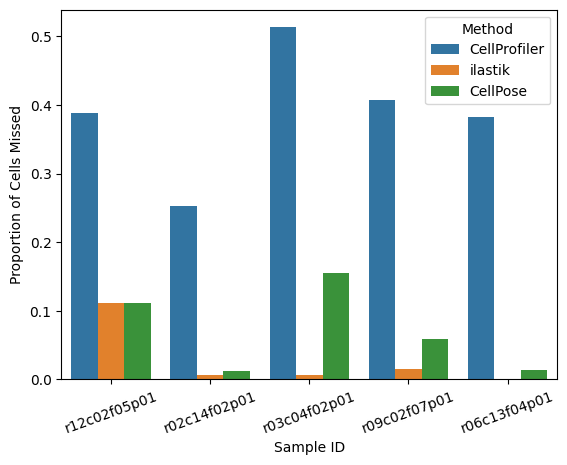

In [14]:
sns.barplot(df_fn_combined, x="Sample ID", y="Proportion of Cells Missed", hue="Method") 
plt.xticks(rotation=20)